# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 3</p>
## <p style="text-align: center;">Total points: 85</p>
## <p style="text-align: center;">Due: Monday, **Oct 18th** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Mahika Bansal

EID: mb62835

Name: Dipali Pandey

EID: dp33957

# Question 1: Stochastic gradient descent II (20 pts)

Write an SGD solution in Python to the non-linear model without using any other library except for those provided in the code template below. 

$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2 + w_4x_1x_2^2 + w_5x_2^3$$ 

The solution class template is given. The `init()` function of the class takes as input the `learning_rate`, `regularization_constant` and `number_of_epochs`. The `fit()` method must take as input `X`, `y` and `update_rule` which can be `'sgd_momentum'` or `'RMSprop'`. The `predict()` method takes an `X` value (optionally, an array of values). 

Use your new gradient descent regression to train your model and predict the data given in 'SGD_samples.csv', for 30 epochs, using learning rates: `[0.0001, 0.001, 0.01, 0.05]` and regularization (ridge regression) constants: `[0, 0.01, 0.1]`. **(8 points)** 

Plot MSE and the $w$ parameters as a function of epoch (for 30 epochs) for the best 2 combinations of `learning_rate` and `regularization_constant` for SGD-Momentum, RMSprop, i.e., for each combination, you should have one plot for MSE vs Epoch and another for the parameters(weights) vs Epoch using respectively SGD-Momentum and RMSprop, hence in total 8 plots. Report the `learning_rate`, `regularization_constant` and MSE at the end of 30 epochs for the two best combinations for SGD-Momentum and RMSprop respectively. **($4\times 2 = 8$ pts)**

Observe the results, compare the performance of the two learning methods **(4 pts)**. 

Here is a blog which you can go through to know about RMSprop and Adam - [blog](http://ruder.io/optimizing-gradient-descent/).

Following codes are for your reference, please don't change the initialization values of the given parameters.


In [4]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.eps = 10**-8
        self.coef = np.zeros(6) # coefficient vector
        self.cache = np.zeros(6) # used only for rmsprop
        self.gama = 0.9 # used only for rmsprop
        self.mu = 0.9 # used in momentum

    def rmsprop(self, gradient, new_grad):
        '''
        updates self.coef based on gradient using rmsprop
        '''
        self.coef = self.coef - (self.learning_rate[self.learning_ind]/np.sqrt(new_grad))*gradient
    
    def sgd_momentum(self, gradient):
        '''
        updates self.coef based on gradient using Sgd_momentum
        '''
        self.coef = self.coef - self.learning_rate[self.learning_ind]*gradient
    
    def fit(self, X, y, learning_ind, reg_ind, update_rule='sgd_momentum', plot=False):
        '''
        Fit the model given X, y. It uses the specified update_rule
        and displays a plot of the coefficients vs epochs, and mse vs epochs if plot is set as True. 
        
        -> use get_features to get the features from X
        -> for epoch in epochs:
            iterate through all x, y.
                compute prediction using linearPredict.
                compute gradient.
                pass this gradient to the corresponding update function and update the coefficients
                keep track of mse and coefficients
        -> plot if required
        
        '''
        coefs = []
        mse = []
        self.learning_ind = learning_ind
        X_f = Regression.get_features(Regression,X)
        gradient = np.zeros(6)
        for epoch in range(self.n_epoch):
            for i in range(X_f.shape[0]):
                error = self.linearPredict(Regression,X_f[i]) - y[i]
                if update_rule=='sgd_momentum':
                    gradient = error*X_f[i] + 2*self.regularization[reg_ind]*self.coef + self.mu*gradient
                    self.sgd_momentum(Regression,gradient)
                elif update_rule=='rmsprop':
                    prev_gradient = np.mean(gradient**2)
                    gradient = error*X_f[i] + 2*self.regularization[reg_ind]*self.coef + self.mu*gradient
                    grad_sq = gradient**2
                    new_grad = self.gama*prev_gradient + (1-self.gama)*(gradient**2)
                    self.rmsprop(Regression,gradient,new_grad)
            coefs.append(self.coef)
            residuals = y - self.linearPredict(Regression,X_f)         
            mse.append(np.mean(residuals**2))
        self.lowest_mse = mse[-1]
        
        if plot:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.plot(range(self.n_epoch),coefs[:,4],label='w4')
            plt.plot(range(self.n_epoch),coefs[:,5],label='w5')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')
        
        return self.lowest_mse
      

    def get_features(self, X):
        x = np.zeros((X.shape[0], 6))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = (X[:,0]**2)*X[:,1]
        x[:,4] = X[:,0] * (X[:,1]**2)
        x[:,5] = X[:,1]**3
       
        return x
        
    def linearPredict(self, X_features):
        '''
        returns the dot product of X and self.coef
        '''
        return np.matmul(X_features,self.coef)

In [3]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

num_terms = 6

data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 30
learning_rate = [0.0001, 0.001, 0.01, 0.05]
regularization = [0, 0.01, 0.1]

In [6]:
mse_sgdm = pd.DataFrame(columns=["Learning_Rate","Regularization","MSE"])
Regression.__init__(Regression,learning_rate,regularization,n_epochs)
for i in range(len(learning_rate)):
    for j in range(len(regularization)):
        mse = Regression.fit(Regression,X,y,i,j,'sgd_momentum',False)
        mse_sgdm = mse_sgdm.append(pd.DataFrame([[learning_rate[i],regularization[j],mse]],columns=["Learning_Rate","Regularization","MSE"]),ignore_index=True)
mse_sgdm.sort_values(by='MSE',inplace=True)

mse_rms = pd.DataFrame(columns=["Learning_Rate","Regularization","MSE"])
Regression.__init__(Regression,learning_rate,regularization,n_epochs)
for i in range(len(learning_rate)):
    for j in range(len(regularization)):
        mse_rmsprop = Regression.fit(Regression,X,y,i,j,'rmsprop',False)
        mse_rms = mse_rms.append(pd.DataFrame([[learning_rate[i],regularization[j],mse_rmsprop]],columns=["Learning_Rate","Regularization","MSE"]),ignore_index=True)
mse_rms.sort_values(by='MSE',inplace=True)


print("Best values for SGD Momentum : \n", mse_sgdm.head(2))
print("Best values for RMSProp : \n", mse_rms.head(2))

C:\Users\ashis\anaconda3\lib\site-packages\ipykernel_launcher.py:66: RuntimeWarning: overflow encountered in square
C:\Users\ashis\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in multiply
C:\Users\ashis\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in multiply


Best values for SGD Momentum : 
    Learning_Rate Regularization       MSE
3         0.0010              0  0.020195
1         0.0001           0.01  0.020476
Best values for RMSProp : 
    Learning_Rate Regularization       MSE
0         0.0001              0  0.020286
3         0.0010              0  0.020425


SGD 1st case:


0.020195535187159188

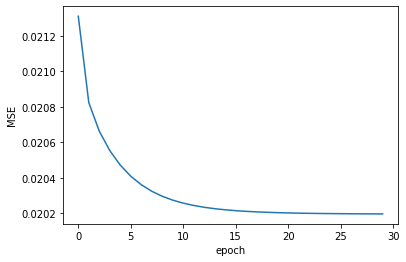

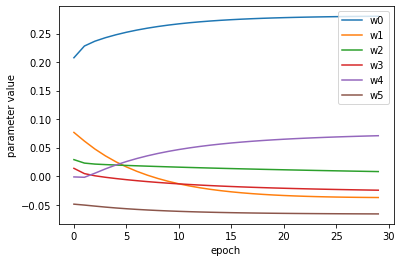

In [7]:
print("SGD 1st case:")
Regression.__init__(Regression,learning_rate,regularization,n_epochs)
Regression.fit(Regression,X,y,learning_rate.index(mse_sgdm.iloc[0,0]),regularization.index(mse_sgdm.iloc[0,1]),'sgd_momentum',True)

SGD 2nd case:


0.020690075766238276

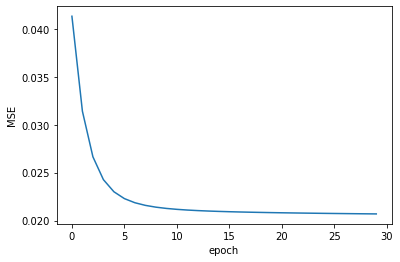

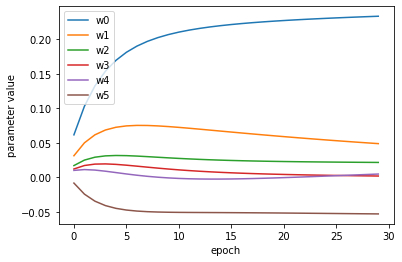

In [8]:
print("SGD 2nd case:")
Regression.__init__(Regression,learning_rate,regularization,n_epochs)
Regression.fit(Regression,X,y,learning_rate.index(mse_sgdm.iloc[1,0]),regularization.index(mse_sgdm.iloc[1,1]),'sgd_momentum',True)

RMS 1st case:


0.020285767540095073

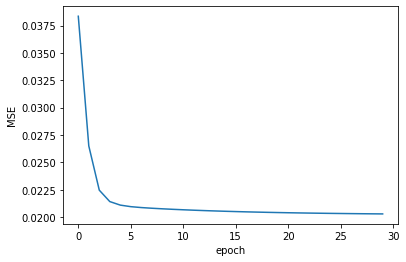

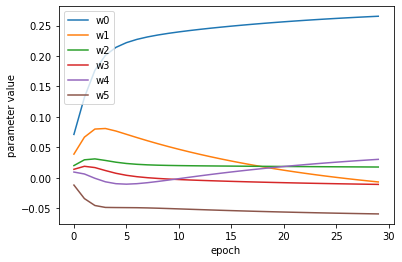

In [9]:
print("RMS 1st case:")
Regression.__init__(Regression,learning_rate,regularization,n_epochs)
Regression.fit(Regression,X,y,learning_rate.index(mse_rms.iloc[0,0]),regularization.index(mse_rms.iloc[0,1]),'rmsprop',True)

RMS 2nd case:


0.02042495590777015

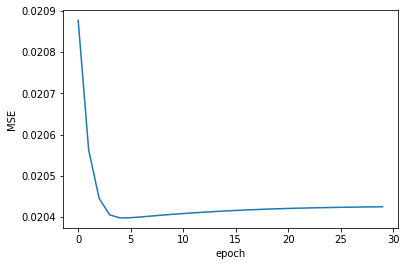

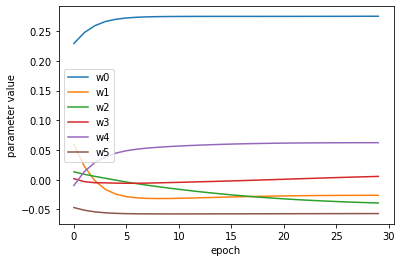

In [10]:
print("RMS 2nd case:")
Regression.__init__(Regression,learning_rate,regularization,n_epochs)
Regression.fit(Regression,X,y,learning_rate.index(mse_rms.iloc[1,0]),regularization.index(mse_rms.iloc[1,1]),'rmsprop',True)

# Answer:

RMSprop gets steeper than SGD Momentum, as RMS prop is using adaptive learning rate and SGD Momentum uses constant rate.

#Question 2: Tensorflow Playground (15 pts)

In this question, you will be playing with [Tensorflow Playground](https://playground.tensorflow.org).

Select "**Classification**" as the **Problem Type**. Among the four datasets shown in DATA, please select the **top right** dataset. 

Use the following settings as the DEFAULT settings for all **subquestions**: Learning rate = 0.03, Activation = Tanh, Regularization = None, Ratio of training to test data = 50%, Noise = 0, Batch Size = 30, input as $X_1$ with $X_2$, One hidden layer with two neurons.

a) **(4 pts)** Use the DEFAULT setting and run two experiments - one using **Tanh** as the activation function and one using the **Linear** activation function. Report the train, test losses for both at the end of **1000 epochs**. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this? 

We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with **Tanh** as the activation.

b) **(4 pts)** Effect of number of hidden units: Keep other settings the same as in DEFAULT, report the training loss and test loss at the end of 1000 epochs **using 4 neurons and 8 neurons in the hidden layer**. What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this? 

c) **(4 pts)** Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT, change the Activation to **ReLU** and use **4 neurons** in the hidden layer. For learning rate 10, 1, 0.1, 0.01 and 0.001, report the train, test losses at the end of **100 epochs**, **1000 epochs** respectively. What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers? 

d) **(3 pts)** Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as $\sin(X_1), X_1^2$ etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc. 

# Answer:

a) At the end of 1000 epochs:
Tanh function: Train loss - 0.208, Test loss - 0.202; the boundary gives 2 decision boundaries separating the data into the 2 classes. The boundaries are linear.

Linear activation: Train loss - 0.498, Test loss - 0.5; the decision boundary hardly separated the 2 given classes.

The tanh function gives slightly better results on the test data whereas linear function underperforms, which might be due to non linear nature of the function. Also it might have converged at local minima, thus not classifying some points correctly. This can be improved by increasing the complexity of the model.


b) Using tanh: 
4 neurons: Test error - 0.024, train error - 0.010; non-linear boundary was able to separate the classes effectively, but overfitting led to higher test error.

8 neurons: Test error - 0.017, train error - 0.007; slight improvement with increased complexity. Like 4 neurons, also gives non linear boundaries and almost converged by 300 epochs. As we increased complexity, the model was able to train better on the observations, thus gave slightly better results than above, but it might lead to overfitting at times.

c) In ReLu:

| Learning Rate | Train Loss(100 epochs) | Train Loss(1000 epochs) | Test Loss(100 epochs) | Test Loss(1000 epochs) |
| :- | :- | :- | :- | :- |
| 10 | 1.132 | 1.132 | 1.129 | 1.129
| 1 | 0.249 | 0.249 | 0.249 | 0.244 |
| 0.1 | 0.008 | 0.000 | 0.010 | 0.002 |
| 0.01 | 0.079 | 0.010 | 0.083 | 0.011 |
| 0.001 | 0.371 | 0.137 | 0.377 | 0.161 |

With learning rate as 0.1, the classifier was able to converge quickly and also attain global minima, whereas decreasing the learning rate further led to low and slow convergence, whereas high learning rate didn't lead to convergence at all even after many epochs.

d) 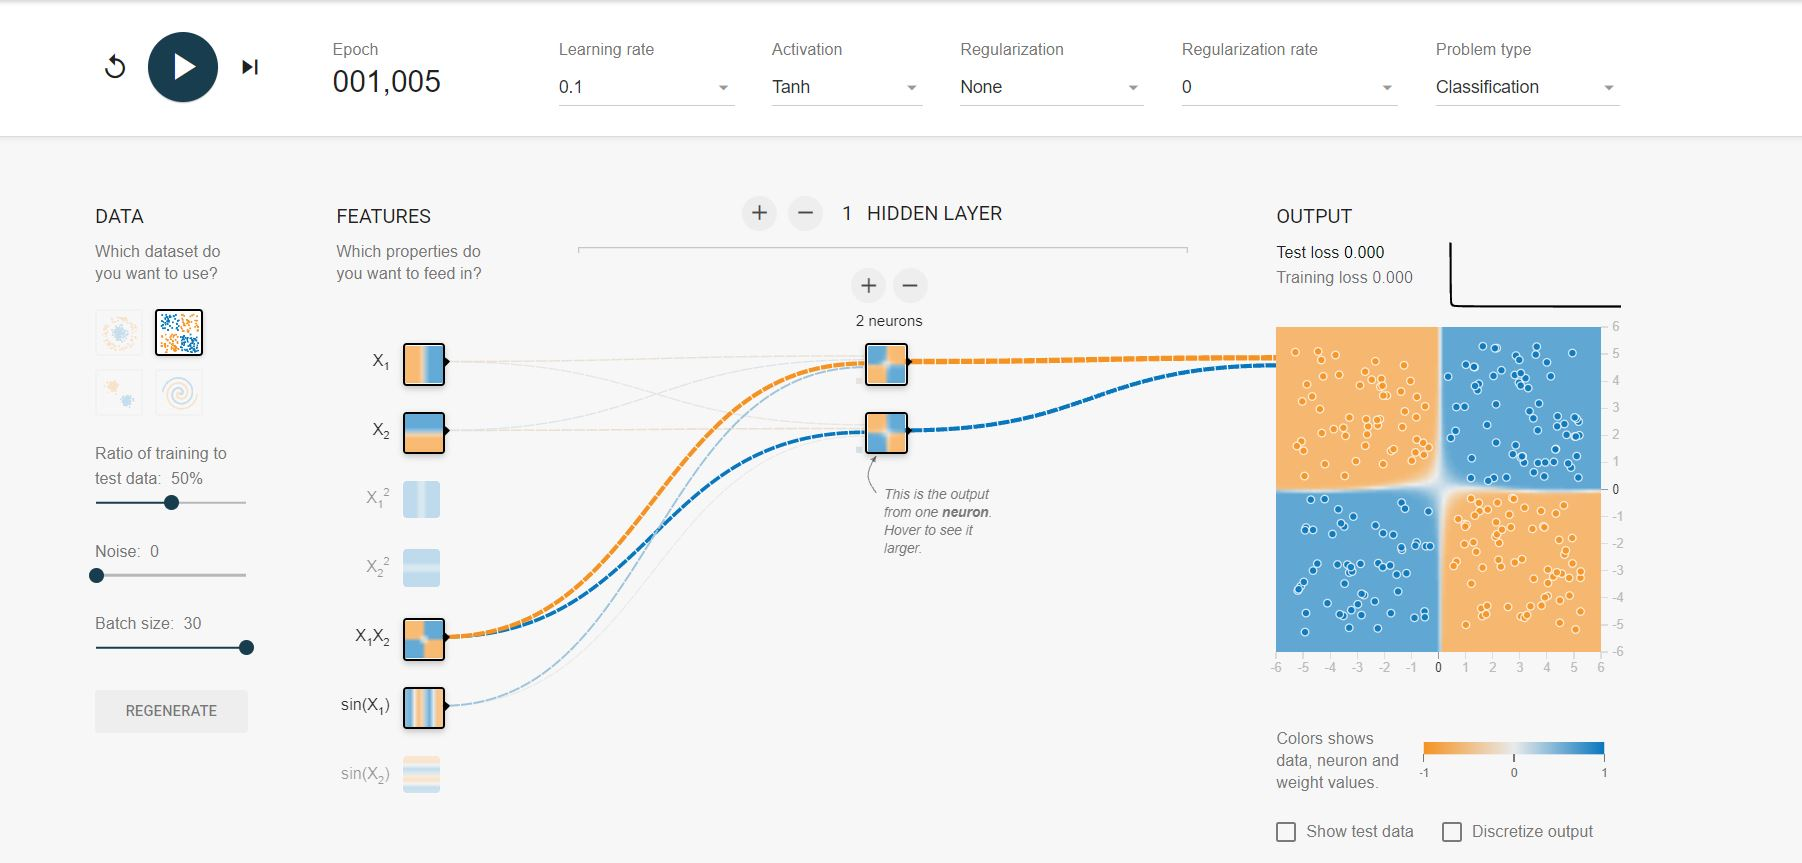

With x1\*x2 and sin(x1), we were able to segregate the classes very quickly (<200 epochs, we reached train loss ~0.002), being non linear functions and with ~1000 epochs we were able to reach train and test loss under $10^{-3}$ . Tanh and ReLu both helped in quick convergence, whereas sigmoid seemed to be a bit slow.

# Question 3: Outlier detection using PyOD (30 pts)

Oulier detection, or anomaly detection is usually an unsupervised learning task where the objective is to identify suspicious observations in data. It has been widely used in military surveillance for enemy activities to prevent attacks, intrusion detection in cyber security, fraud detection for credit cards, etc.

PyOD is a comprehensive and scalable Python library for detecting outlying objects in multivariate data. PyOD includes more than 30 detection algorithms and provides unified APIs which makes it quite handy to use. In this question, you will play with PyOD, explore three different outlier detection algorithms and compare their performances. First let's install PyOD.

```
# install pyod using pip first
!pip install pyod
```

You can load the data stored in 'Q3_train_dataset.csv' and 'Q3_test_dataset.csv' using the following codes.

```
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()
```

 `X_train` and `X_test` contain the features, with the dimension of 5. `y_train` and `y_test` store the outlier labels, 0 means normal data, 1 means outlier data. 
 
a) **(5 pts)** **Fit `X_train` to a linear outlier detection model Minimum Covariance Determinant (MCD) using PyOD**, this [page](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.mcd) will provide some functions you may need. 

```
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# YOUR CODE SHOULD COME HERE, FIT THE MODEL USING X_TRAIN
```
**Use the fitted model to predict the outlier labels of `X_test`. Compute the raw outlier scores on `X_test` using `decision_function()`.**

**Run PyOD's `evaluate_print()` function using the test set ground truth outlier labels and the raw outlier scores predicted by the model, to compute the ROC and Precision@n results .** 

```
from pyod.utils.data import evaluate_print
```

b) **(5 pts)** `X_train` and `X_test` are 5-dimension features, which makes it impossible to visualize them in Euclidean plane. But we can use Principal Component Analysis (PCA) to reduce the dimensions of `X_train` and `X_test` to 2, and then plot them. You may want to use `fit_and_transform()` function.


```
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = # IMPLEMENT
test_principalComponents = # IMPLEMENT
```

After reducing the dimension to 2, now you can visualize the outliers using PyOD's `visualize()` function. Please plot the visualization. You may find [this](https://pyod.readthedocs.io/en/latest/pyod.utils.html#module-pyod.utils.example) useful on how to use `visualize()` .

```
from pyod.utils.example import visualize
```

Now you should be able to observe the ground truth outliers and the outliers predicted by the model.


c) **(20 pts)** Apply the same process as in (a) and (b) to the following two models, and visualize the outlier results. Please compare the performance of the three models in terms of their ROC, Precision@n, and what you observe from the three visualizations.

*   [Proximity-Based model - Clustering Based Local Outlier Factor (CBLOF)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.cblof)
*   [Probabilistic model - Copula-based Outlier Detection (COPOD)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.copod)

```
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD
```

# Answer:

In [12]:
# install pyod using pip first
!pip install pyod

In [13]:
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()

In [14]:
# (a)
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# fit the model using X_train
# YOUR CODE SHOULD COME HERE
clf.fit(X_train)

MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None)

In [15]:
from pyod.utils.data import evaluate_print
# predict the outlier labels of X_test using the trained model, compute the raw outlier scores on X_test using decision_function()
# then use evaluate_print() to print out the evaluation results
# YOUR CODE SHOULD COME HERE
predict = clf.predict(X_test)
raw_scores = clf.decision_function(X_test)
evaluate_print(clf, y_test, raw_scores)

MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None) ROC:0.8689, precision @ rank n:0.6


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


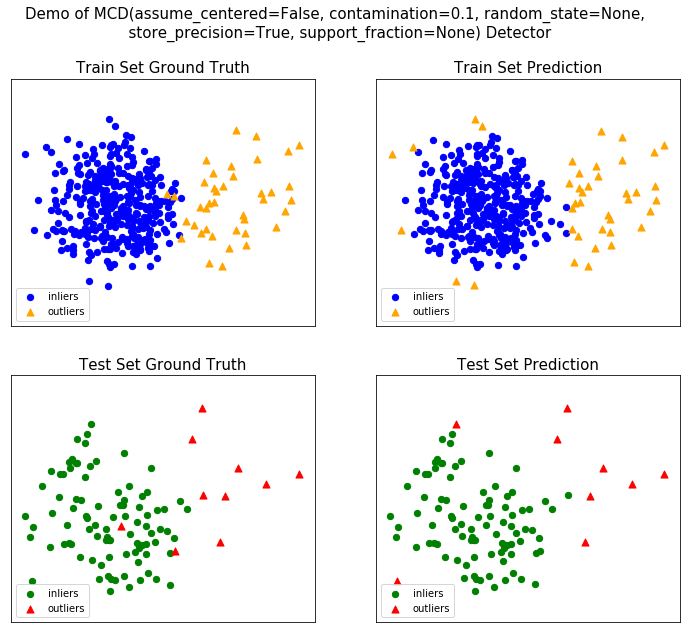

In [16]:
# (b)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = pca.fit_transform(X_train)
test_principalComponents = pca.fit_transform(X_test)

from pyod.utils.example import visualize
# Visualize the ground truth outliers and predicted outliers using visualize()
# YOUR CODE SHOULD COME HERE
clf.fit(train_principalComponents)
y_train_pred = clf.predict(train_principalComponents)
y_test_pred = clf.predict(test_principalComponents)
visualize(clf, train_principalComponents, y_train, test_principalComponents, y_test, y_train_pred,y_test_pred, show_figure=True,save_figure=False)

In [17]:
# (c)
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD

# YOUR CODE SHOULD COME HERE

clf = CBLOF() 

# fit the model using X_train and prediction
clf.fit(X_train)
predict = clf.predict(X_test)
raw_scores = clf.decision_function(X_test)
evaluate_print(clf, y_test, raw_scores)

CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False) ROC:0.9178, precision @ rank n:0.6


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


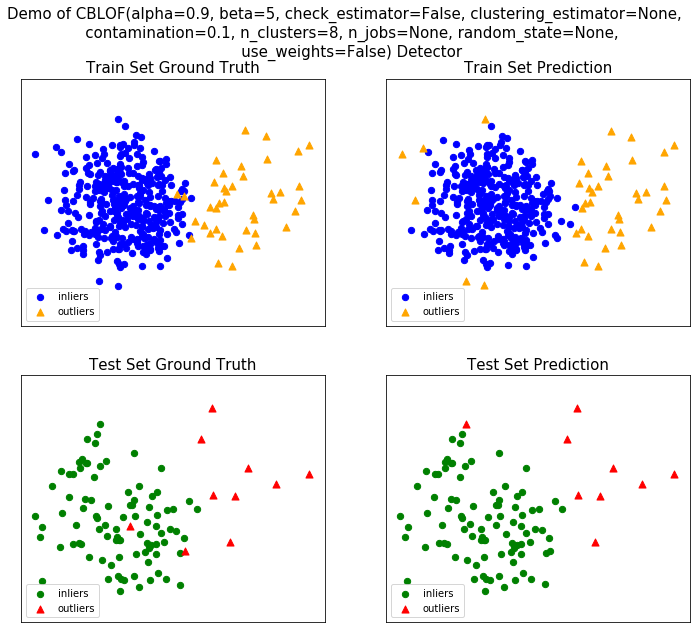

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = pca.fit_transform(X_train)
test_principalComponents = pca.fit_transform(X_test)

from pyod.utils.example import visualize
clf.fit(train_principalComponents)
y_train_pred = clf.predict(train_principalComponents)
y_test_pred = clf.predict(test_principalComponents)
visualize(clf, train_principalComponents, y_train, test_principalComponents, y_test, y_train_pred,y_test_pred, show_figure=True,save_figure=False)

In [19]:
clf = COPOD() 

# fit the model using X_train and prediction
clf.fit(X_train)
predict = clf.predict(X_test)
raw_scores = clf.decision_function(X_test)
evaluate_print(clf, y_test, raw_scores)

COPOD(contamination=0.1, n_jobs=1) ROC:0.9556, precision @ rank n:0.8


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


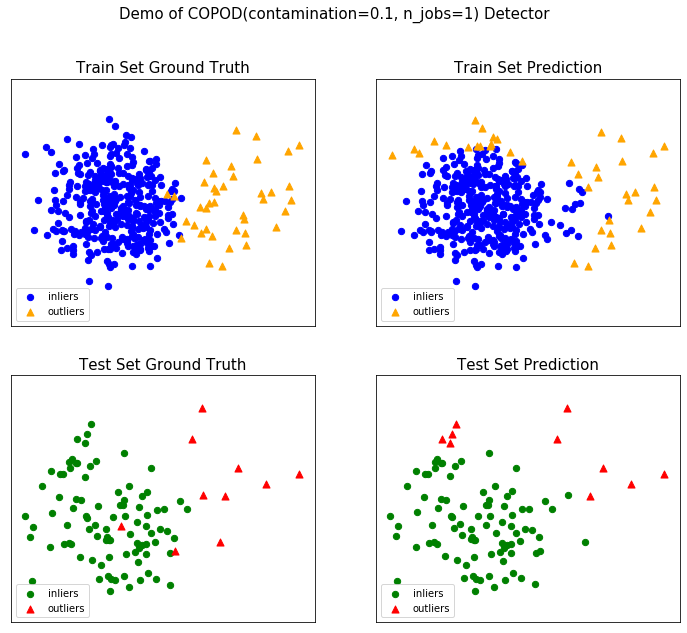

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = pca.fit_transform(X_train)
test_principalComponents = pca.fit_transform(X_test)

from pyod.utils.example import visualize
clf.fit(train_principalComponents)
y_train_pred = clf.predict(train_principalComponents)
y_test_pred = clf.predict(test_principalComponents)
visualize(clf, train_principalComponents, y_train, test_principalComponents, y_test, y_train_pred,y_test_pred, show_figure=True,save_figure=False)

#### MCD performs the worst with least ROC. CBLOF performs slightly better and COPOD gives the best results

# Question 4: PCA Conceptual questions (5 pts)
Explain the principle of Principal Component Analysis algorithm, especially why we can select the best projection bases based on the covariance matrix of data from the perspective of optimization?

# Answer:

Principal Component Analysis is orthogonal linear transformation that converts high dimensional data to lower dimension, using scalar projections of the variables, explaining the greatest variance. This is an unsupervised technique, used for feature  reduction, which in turn reduces model complexity.

PCA uses covariance matrix computation of the continuous variables. This is done to assess variance of the variables with respect to each other, and check if any relationship exists, which might be causing redundancy of information.

\begin{align*}
Cov(X, Y) ≡ σ^2_{XY} ≡ \langle(X − \langle X \rangle)(Y − \langle Y \rangle)\rangle
\end{align*} 

Positive covariance shows high correlation whereas negative correlation shows inverse correlation. Post this, eigenvectors are computed to create uncorrelated variables which can provide maximum information or contain the maximum variance (larger the variance, larger the dispersion of data and thus more the information captured). They are selected in decreasing order of the variance explained, such that top k (k depending on the data) features can be utilised further. 



# Question 5: Pre-processing and sampling (15 pts)

The following dataset contains House prices describing the sales of individual residential property in Ames, Iowa data with explanatory variables describing almost every aspect of residential homes and dependent variable being SalePrice. Here, some cells of most columns in the dataset contain NaN values.













In [21]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
np.random.seed(100)

data = pd.read_csv("sales_data.csv")
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,...,0,0,0,NaN,NaN,NaN,0,2,2008,208500
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,...,0,0,0,NaN,NaN,NaN,0,5,2007,181500
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,...,0,0,0,NaN,NaN,NaN,0,9,2008,223500
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,...,0,0,0,NaN,NaN,NaN,0,2,2006,140000
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,...,0,0,0,NaN,NaN,NaN,0,12,2008,250000



a) **(2 pts)** Print the number of NaN values in each column.


In [22]:
data.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Alley            1369
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          8
ExterQual           0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageCars          0
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeatur

b) **(3 pts)** Create a copy of `data`, and name it `data_dm`, then create a new column in `data_dm` named `binned_yr_built` and apply binning to the column `yr_built`. Use `pandas.cut()` and modify its paramter list as below:

```
bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']
include_lowest=True
```
Next, perform one-hot encoding on this new column.

In [23]:
import copy
import pandas as pd
data_dm = copy.deepcopy(data)
data_dm['binned_yr_built'] = pd.cut(data['YearBuilt'], bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020], labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020'],include_lowest=True)

In [24]:
data_dm = pd.get_dummies(data_dm, columns = ['binned_yr_built'])
data_dm.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,MiscVal,MoSold,YrSold,SalePrice,binned_yr_built_1900-1920,binned_yr_built_1920-1940,binned_yr_built_1940-1960,binned_yr_built_1960-1980,binned_yr_built_1980-2000,binned_yr_built_2000-2020
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,...,0,2,2008,208500,0,0,0,0,0,1
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,...,0,5,2007,181500,0,0,0,1,0,0
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,...,0,9,2008,223500,0,0,0,0,0,1
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,...,0,2,2006,140000,1,0,0,0,0,0
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,...,0,12,2008,250000,0,0,0,0,1,0



c) **(2 pts)** Drop the columns which have more than 65 percentage of missing values.

In [25]:
data_dm = data_dm.loc[:, data_dm.isna().mean() < .65]
data_dm.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,MiscVal,MoSold,YrSold,SalePrice,binned_yr_built_1900-1920,binned_yr_built_1920-1940,binned_yr_built_1940-1960,binned_yr_built_1960-1980,binned_yr_built_1980-2000,binned_yr_built_2000-2020
0,60,RL,65.0,8450,7,5,2003,2003,196.0,Gd,...,0,2,2008,208500,0,0,0,0,0,1
1,20,RL,80.0,9600,6,8,1976,1976,0.0,TA,...,0,5,2007,181500,0,0,0,1,0,0
2,60,RL,68.0,11250,7,5,2001,2002,162.0,Gd,...,0,9,2008,223500,0,0,0,0,0,1
3,70,RL,60.0,9550,7,5,1915,1970,0.0,TA,...,0,2,2006,140000,1,0,0,0,0,0
4,60,RL,84.0,14260,8,5,2000,2000,350.0,Gd,...,0,12,2008,250000,0,0,0,0,1,0



d) **(3 pts)** Take a sample of 800 rows at random and compute its mean, compare this value with the population mean.
  

In [26]:
np.random.seed(6)
sample_ages = np.random.choice(a= data['SalePrice'], size=800)

#Sample mean
print(sample_ages.mean())

#Population mean
print(data['SalePrice'].mean())

178292.63125
180921.19589041095


e) **(2pts)** Calculate the 95% confidence intervals for SalePrice with a sample size of 100. 

**(3pts)** Calculate the 95% confidence intervals for 100 different trials with a sample size of 500. Plot the confidence intervals and interpret how it captures the population mean.

In [27]:
np.random.seed(10)
sample_size = 100
sample = np.random.choice(a= data_dm['SalePrice'],
                          size = sample_size)
sample_mean = sample.mean()

#Get the critical Z value

import scipy.stats
z_critical = scipy.stats.norm.ppf(.05)

#Get population standard deviation

import statistics
pop_stdev = statistics.stdev(data_dm['SalePrice'])

#margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

#confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

#Print confidence interval and true mean value
print("Confidence Interval: ", confidence_interval, "True Mean: ", data_dm['SalePrice'].mean())

Confidence Interval:  (195159.65890010187, 169025.40109989812) True Mean:  180921.19589041095


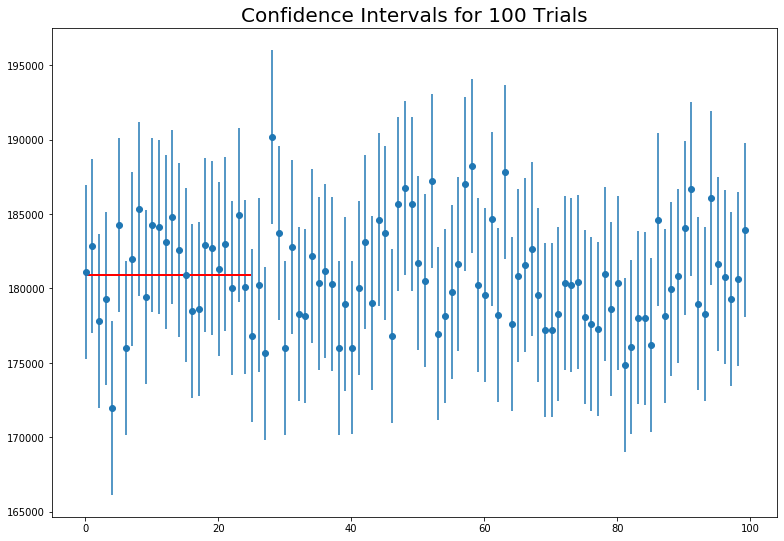

In [28]:
np.random.seed(12)

sample_size = 500

intervals = []
sample_means = []

for sample in range(100):
    sample = np.random.choice(a= data_dm['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    # compute z critical value
    z_critical = scipy.stats.norm.ppf(.05)

    # compute population standard deviation
    pop_stdev = statistics.stdev(data_dm['SalePrice'])

  
    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))
    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
    
plt.figure(figsize=(13, 9))

plt.errorbar(x=np.arange(0.1, 100, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=data['SalePrice'].mean(), 
           linewidth=2.0,
           color="red")
plt.title('Confidence Intervals for 100 Trials', fontsize = 20)
plt.show()

#### In most of the cases, the confidence interval of sample mean captures the population mean.